In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
# from sklearn.model_selection import train_test_split
# from keras.utils.np_utils import to_categorical

# # CNN
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import Conv1D, MaxPooling1D, Flatten
# from keras.optimizers import Adam

# from keras.layers.normalization import BatchNormalization

In [6]:
train_data = pd.read_csv("mitbih_train.csv", header = None, sep = ',')
test_data = pd.read_csv("mitbih_test.csv", header = None, sep = ',')

In [7]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [11]:
train_data = train_data
# train_data = train_data.clip(0)

In [14]:
sbn.catplot(x = 0, kind = 'count', data = train_data)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000002710B39A430> (for post_execute):


KeyboardInterrupt: 

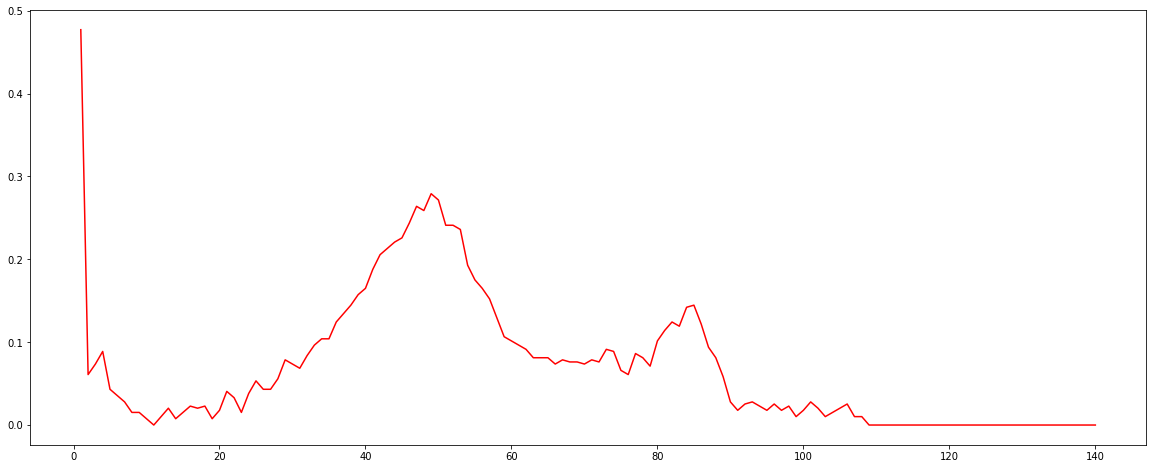

In [19]:
# sbn.set_style('whitegrid')
plt.figure(figsize = (20,8))
plt.plot(train_data.iloc[14,1:141],color = 'red')
plt.show()

In [7]:
# dataframes
df_1 = train_data[train_data[0] == 1]-1
df_2 = train_data[train_data[0] == 2]-1
df_3 = train_data[train_data[0] == 3]-1
df_4 = train_data[train_data[0] == 4]-1
df_5 = train_data[train_data[0] == 5]-1

In [8]:
from sklearn.utils import resample

df_2_upsample = resample(df_2, n_samples = 292, replace= True, random_state=123)
df_3_upsample = resample(df_3, n_samples = 292, replace= True, random_state=123)
df_4_upsample = resample(df_4, n_samples = 292, replace= True, random_state=123)
df_5_upsample = resample(df_5, n_samples = 292, replace= True, random_state=123)

In [9]:
train_df = pd.concat([df_1,df_2_upsample,df_3_upsample,df_4_upsample,df_5_upsample])

In [10]:
train_data, val_data = train_test_split(train_df, test_size = 0.2, random_state=7)

In [11]:
target_train = train_data[0]
target_test = val_data[0]

In [12]:
target_train.size

1168

In [13]:
target_test.size

292

In [14]:
# sample_test = target_train.copy()

In [15]:
# sample_test = sample_test[sample_test]
# df_1 = train_data[train_data[0] == 1]-1

In [16]:
# train_df

In [17]:
# categorical

y_train =to_categorical(target_train)

In [61]:
y_train

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [62]:
target_train

497    3
187    0
476    2
474    2
498    4
      ..
211    0
379    1
448    1
498    4
175    0
Name: 0, Length: 1168, dtype: int64

In [49]:
target_train.unique()

array([3, 0, 2, 4, 1])

In [19]:
x_train = train_data.iloc[:, 1:].values
x_test = val_data.iloc[:, 1:].values

In [20]:
x_train = x_train.reshape(len(x_train), x_train.shape[1],1)
x_test = x_test.reshape(len(x_test), x_test.shape[1],1)

In [21]:
y_test = to_categorical(target_test)

In [22]:
def build_model():
    model = Sequential()
    
    model.add(Conv1D(filters = 64, kernel_size = 6, activation = 'relu', padding = 'same', input_shape = (140,1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides = (2), padding = 'same'))
    
    model.add(Conv1D(filters = 64, kernel_size = 6, activation = 'relu', padding ='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides = (2), padding = 'same'))
    
    model.add(Conv1D(filters = 64, kernel_size = 6, activation = 'relu', padding ='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides = (2), padding = 'same'))
    
    model.add(Flatten())
    
    model.add(Dense(units = 64, activation = 'relu'))
    
    model.add(Dense(units = 64, activation = 'relu'))
    
    model.add(Dense(units = 5, activation = 'softmax'))
    
    model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [23]:
model = build_model()

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 140, 64)           448       
_________________________________________________________________
batch_normalization (BatchNo (None, 140, 64)           256       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 70, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 70, 64)            24640     
_________________________________________________________________
batch_normalization_1 (Batch (None, 70, 64)            256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 35, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 35, 64)            2

In [25]:
history = model.fit(x_train, y_train, epochs = 25, batch_size = 32, validation_data=(x_test,y_test))

Epoch 1/25
37/37 [==============================] - 3s 46ms/step - loss: 0.6679 - accuracy: 0.7444 - val_loss: 1.4109 - val_accuracy: 0.5274
Epoch 2/25
37/37 [==============================] - 1s 28ms/step - loss: 0.1730 - accuracy: 0.9286 - val_loss: 1.3558 - val_accuracy: 0.4589
Epoch 3/25
37/37 [==============================] - 1s 23ms/step - loss: 0.0910 - accuracy: 0.9709 - val_loss: 1.3288 - val_accuracy: 0.3596
Epoch 4/25
37/37 [==============================] - 1s 18ms/step - loss: 0.0808 - accuracy: 0.9726 - val_loss: 1.2831 - val_accuracy: 0.3562
Epoch 5/25
37/37 [==============================] - 1s 19ms/step - loss: 0.0299 - accuracy: 0.9911 - val_loss: 1.2380 - val_accuracy: 0.4178
Epoch 6/25
37/37 [==============================] - 1s 19ms/step - loss: 0.0153 - accuracy: 0.9962 - val_loss: 1.2831 - val_accuracy: 0.4315
Epoch 7/25
37/37 [==============================] - 1s 18ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 1.0945 - val_accuracy: 0.5342
Epoch 8/25
37

In [27]:
model.evaluate(x_test,y_test)

10/10 [==============================] - 0s 7ms/step - loss: 0.0132 - accuracy: 0.9932


[0.01317024976015091, 0.9931507110595703]

In [33]:
predict = model.predict(x_train)

In [52]:
x_train

array([[[-1.02196384],
        [-1.91243389],
        [-2.9033529 ],
        ...,
        [ 0.4442803 ],
        [ 0.4323469 ],
        [ 0.4570283 ]],

       [[-3.1191075 ],
        [-4.0261182 ],
        [-4.2929295 ],
        ...,
        [-0.78044912],
        [-1.19777673],
        [-2.161151  ]],

       [[-1.301966  ],
        [-2.1034482 ],
        [-2.2578279 ],
        ...,
        [-5.6490478 ],
        [-6.2030299 ],
        [-6.7976446 ]],

       ...,

       [[-1.27624344],
        [-2.3055061 ],
        [-3.0016367 ],
        ...,
        [-4.3375872 ],
        [-3.8209266 ],
        [-2.1204185 ]],

       [[-0.711989  ],
        [-2.0980196 ],
        [-3.5002499 ],
        ...,
        [-0.95012758],
        [-0.98908504],
        [-1.08153424]],

       [[-0.32060178],
        [-2.6369953 ],
        [-4.8935294 ],
        ...,
        [ 0.2295529 ],
        [ 0.6712558 ],
        [ 0.2564556 ]]])

In [38]:
train_data[0]

497    3
187    0
476    2
474    2
498    4
      ..
211    0
379    1
448    1
498    4
175    0
Name: 0, Length: 1168, dtype: int64

In [34]:
predict

array([[3.6031390e-06, 3.7983620e-05, 7.8213412e-07, 9.9995768e-01,
        5.7567012e-10],
       [9.9995208e-01, 1.1357050e-05, 8.3717548e-09, 1.5071899e-05,
        2.1569762e-05],
       [8.4097383e-07, 8.0001355e-06, 9.9998224e-01, 8.9293671e-06,
        2.6297318e-08],
       ...,
       [1.4543010e-06, 9.9999666e-01, 1.0977178e-08, 1.9392335e-06,
        1.2656753e-11],
       [4.9784621e-06, 3.3297906e-07, 4.1832195e-08, 6.8232225e-07,
        9.9999392e-01],
       [1.0000000e+00, 6.0368786e-09, 2.4295937e-11, 4.6029451e-09,
        1.6206161e-09]], dtype=float32)

In [30]:
yhat = np.argmax(predict,axis = 1)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(np.argmax(y_test, axis = 1), yhat)
print(classification_report(np.argmax(y_test,axis =1),yhat))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        61
           1       1.00      0.98      0.99        61
           2       1.00      1.00      1.00        62
           3       0.98      1.00      0.99        47
           4       1.00      1.00      1.00        61

    accuracy                           0.99       292
   macro avg       0.99      0.99      0.99       292
weighted avg       0.99      0.99      0.99       292



<AxesSubplot:>

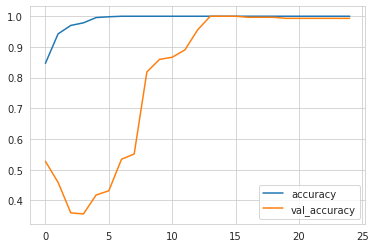

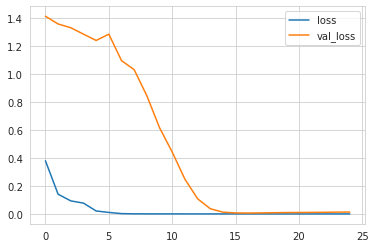

In [32]:
# converting hsitory to dataframe
pd.DataFrame(history.history)
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
pd.DataFrame(history.history)[['loss', 'val_loss']].plot() 

In [53]:
sample = pd.read_csv("ECG5000_TRAIN.tsv", header = None, sep = '\t')

In [58]:
sample

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,1,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818287,-1.250522,...,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,...,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,1,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490658,-1.183580,...,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,1,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,...,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,1,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,...,0.966606,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,4,-0.478577,-1.779959,-2.398159,-3.170112,-3.559732,-3.573956,-2.989770,-2.270605,-1.688277,...,1.294840,1.160884,1.456331,2.209421,2.507175,2.198534,1.705849,1.492642,1.561890,1.520161
496,4,-1.325210,-2.480992,-2.965356,-3.342392,-3.176351,-2.891528,-2.369679,-1.598750,-1.071751,...,0.552076,-0.172154,-0.864803,-1.549854,-2.460243,-3.366562,-3.466546,-2.718380,-1.855209,-1.539958
497,4,-0.021964,-0.912434,-1.903353,-2.662829,-3.122156,-3.451490,-3.392982,-2.929937,-2.256294,...,1.528745,1.339479,1.457995,2.128078,2.630759,2.295748,1.764967,1.444280,1.432347,1.457028
498,5,0.288011,-1.098020,-2.500250,-3.598599,-3.650608,-3.281587,-2.231601,-1.250656,-1.072574,...,0.081634,-0.029242,0.071414,0.118161,-0.071967,-0.171214,0.131211,0.049872,0.010915,-0.081534


In [56]:
sample_test = sample.iloc[:, 1:].values
sample_test = sample_test.reshape(len(sample_test), sample_test.shape[1],1)

In [64]:
sample_test[495]

array([[-4.7857737e-01],
       [-1.7799590e+00],
       [-2.3981589e+00],
       [-3.1701118e+00],
       [-3.5597319e+00],
       [-3.5739558e+00],
       [-2.9897701e+00],
       [-2.2706046e+00],
       [-1.6882766e+00],
       [-1.3598716e+00],
       [-1.3118421e+00],
       [-1.0778821e+00],
       [-6.9827578e-01],
       [-2.1641865e-01],
       [-7.7802294e-02],
       [-1.0695651e-01],
       [-9.2762962e-02],
       [-1.2619515e-01],
       [-9.3113189e-02],
       [-8.8585489e-02],
       [-1.0115715e-01],
       [-1.1998818e-01],
       [-2.0823966e-01],
       [-1.9049072e-01],
       [-9.5053862e-02],
       [-1.2877734e-01],
       [-1.8909484e-01],
       [-9.1077900e-02],
       [-1.2073380e-01],
       [-1.9018952e-01],
       [-1.7317598e-01],
       [-2.2600846e-01],
       [-2.4595544e-01],
       [-2.1449448e-01],
       [-2.0418280e-01],
       [-2.1137927e-01],
       [-2.2971654e-01],
       [-2.2738392e-01],
       [-2.0771376e-01],
       [-2.4155164e-01],


In [59]:
predictSample = model.predict(sample_test)

In [65]:
predictSample[495]

array([5.3016641e-03, 4.0934044e-01, 8.2090555e-05, 5.8519459e-01,
       8.1189901e-05], dtype=float32)

In [66]:
model.save("ecg_model")

INFO:tensorflow:Assets written to: ecg_model/assets
